# Classifying Airplane Accidents Based on Severity

## Context

In 2018, there were [15 airplane accidents](https://www.cnn.com/2019/01/02/health/plane-crash-deaths-intl/index.html) of varying severity each year, with over 500 deaths. Although airplane safety continues to increase each year, we are interested in knowing if this number can be reduced further. We plan to investigate this by predicting the severity of a crash based on crash details, and determining which factors weight the most heavily on the severity of an accident. 

[Data Source](https://www.hackerearth.com/challenges/competitive/airplane-accident-severity-hackerearth-machine-learning-challenge/machine-learning/how-severe-can-an-airplane-accident-be-03e7a3f1/)

## Goals

We want to predict the severity of an airplane accident based on several features:
    - Number of days since inspection 
    - Total safety complains
    - An estimation of how much control the pilot had during the incident
    - Turbulence
    - Cabin temperature
    - Accident type
    - Max elevation achieved
    - Number of prior violations
    - Safety score (a measure of how safe the plane was deemed to be)
    
Our target variable is Severity. The Severity feature ranks the severity of each airplane accident one a scale of low damage with few/no injuries (Minor_Damage_And_Injuries) to high damage with fatalities (Highly_Fatal_And_Damaging). 

## Imports

In [39]:
from cleaning import *

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

sns.set(style="whitegrid")

## Dataframe

#### Column Descriptors

Accident_ID: unique id assigned to each row

Accident_Type_Code: the type of accident (factor, not numeric)

Cabin_Temperature: the last recorded temperature before the incident, measured in degrees fahrenheit

Turbulence_In_gforces: the recorded/estimated turbulence experienced during the accident

Control_Metric: an estimation of how much control the pilot had during the incident given the factors at play

Total_Safety_Complaints: number of complaints from mechanics prior to the accident

Days_Since_Inspection: how long the plane went without inspection before the incident

Safety_Score: a measure of how safe the plane was deemed to be

Violations: number of violations that the aircraft received during inspections

Severity: a description (4 level factor) on the severity of the crash

***missing descriptors: Max_Elevation, Adverse_Weather_Metric***

In [2]:
df_train = pd.read_csv('3c055e822d5b11ea/train.csv')

df_train

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Significant_Damage_And_Serious_Injuries,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150,11493
9996,Highly_Fatal_And_Damaging,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898,305
9997,Significant_Damage_And_Serious_Injuries,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173,612
9998,Minor_Damage_And_Injuries,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381,4963


In [3]:
df_train = df_train.drop(['Accident_ID'], axis = 1)
df_train

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883
...,...,...,...,...,...,...,...,...,...,...,...
9995,Significant_Damage_And_Serious_Injuries,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150
9996,Highly_Fatal_And_Damaging,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898
9997,Significant_Damage_And_Serious_Injuries,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173
9998,Minor_Damage_And_Injuries,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381


In [4]:
# replace severity categories with numerical labels
df_train = df_train.replace(["Minor_Damage_And_Injuries", "Significant_Damage_And_Serious_Injuries", "Significant_Damage_And_Fatalities", "Highly_Fatal_And_Damaging"], [1, 2, 3, 4])
df_train

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,3,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,2,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,3,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883
...,...,...,...,...,...,...,...,...,...,...,...
9995,2,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150
9996,4,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898
9997,2,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173
9998,1,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381


## Splitting and Training 

In [15]:
# split test and train data
X = df_train.drop(['Severity'], axis=1)
y = df_train['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
# check for multicolinearity 

abs(X_train.corr()) > 0.75

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Safety_Score,True,False,False,False,False,False,False,False,False,False
Days_Since_Inspection,False,True,False,False,False,False,False,False,False,False
Total_Safety_Complaints,False,False,True,False,False,False,False,False,False,False
Control_Metric,False,False,False,True,False,False,False,False,False,False
Turbulence_In_gforces,False,False,False,False,True,False,False,False,False,False
Cabin_Temperature,False,False,False,False,False,True,False,False,False,False
Accident_Type_Code,False,False,False,False,False,False,True,False,False,False
Max_Elevation,False,False,False,False,False,False,False,True,False,False
Violations,False,False,False,False,False,False,False,False,True,False
Adverse_Weather_Metric,False,False,False,False,False,False,False,False,False,True


# Modeling

We will try a few different modeling methods to see which one produces the most accurate results:

- Logistic regression
- Basic decision tree classifier, bagged
- Random forest
- KNN


### Logistic Regression 

In [8]:
lr = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = lr.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_hat_test = model_log.predict(X_test)
y_hat_train = model_log.predict(X_train)

### Bagged Tree

The bagged tree is similar to the unbagged tree classifier, except it uses bagging to encourage diveristy in the "trees" our model samples. By bagging, we perform sampling with replacement which uses random parts of the dataset instead of the entire dataset.

In [17]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None), 
                                 n_estimators=20)

bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [18]:
print("Training data accuracy score:", bagged_tree.score(X_train, y_train))
print("Test data accuracy score:", bagged_tree.score(X_test, y_test))

Training data accuracy score: 0.9985333333333334
Test data accuracy score: 0.94


### Random Forest

The Random Forest algorithm is a supervised learning algorithm that can be used for classification. It is an ensemble of decision tree classifiers. Ensemble methods are naturally robust because they are resistant to variance in the data. 

In [19]:
# instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=None)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
print("Training data accuracy score:", forest.score(X_train, y_train))
print("Test data accuracy score:", forest.score(X_test, y_test))

Training data accuracy score: 1.0
Test data accuracy score: 0.9328


#### Plotting Feature Importance

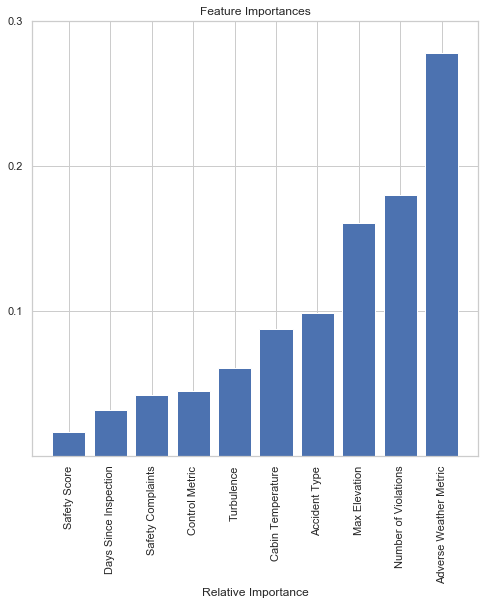

In [40]:
importances = forest.feature_importances_
indices = np.argsort(importances)
y_ticks = [0.1, 0.2, 0.3]

plt.figure(figsize=(8,8))
plt.title('Feature Importance')
plt.bar(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(y_ticks)
plt.xticks(np.arange(10), ('Safety Score', 'Days Since Inspection', 'Safety Complaints', 'Control Metric', 'Turbulence', 'Cabin Temperature', 'Accident Type', 'Max Elevation', 'Number of Violations', 'Adverse Weather Metric'), rotation = 90)
plt.xlabel('Relative Importance')
plt.show()

#### Using RandomSearch To Improve Our Random Forest Model

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
##rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
##rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
##rf_random.fit(X_train, y_train)

### KNN

In [ ]:
# scaling the X_train data using StandardScaler
#X_train = X_train
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(X_train)

#scaled_data